# 감성분석(a)

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4893335/4893335 [==============================] - 11s 2us/step


In [3]:
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')
print('train text length:',len(train_text),' characters')
print('test  text length:',len(test_text),' characters')
print('\n')
print(train_text[:5])
print(train_text[:300])

train text length: 6937271  characters
test  text length: 2318260  characters


id	do
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [5]:
# import pandas as pd
# df_train = pd.read_csv(path_to_train_file,sep='\t')
# df_train

In [6]:
# 각 문장을 '\n'으로 분리 -> 헤더제외 -> '\t'으로 분리 -> 마지막 문자 정수로 변환하여 2차원으로 변환
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)  # (150000, 1) (50000, 1)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [10]:
# X 값을 추출
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
print(len(train_text_X))
train_text_X[:5]

150000


['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

### 텍스트 전처리

In [12]:
# train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [clean_str(sentence) for sentence in train_text_X]
train_text_X[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 ! 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [13]:
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split() for sentence in train_text_X]
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나'],
 ['너무재밓었다그래서보는것을추천한다'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그의',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨에서',
  '늙어보이기만',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

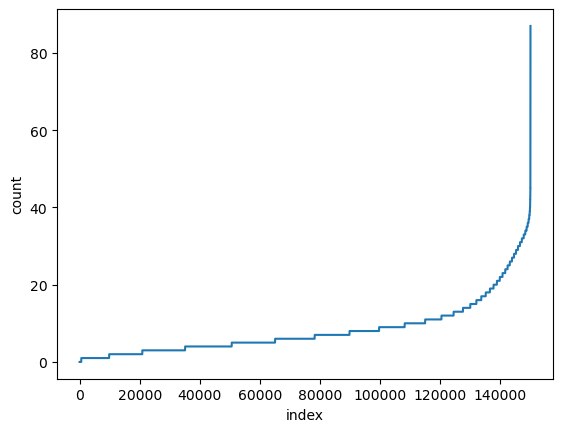

143105


In [14]:
# 150000개 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

print(sum([int(l<=25) for l in sentence_len]))
# 15 만개 문장 중 단어 갯수가 25개 이하인 문장의 수가 142590개이다, 25를 sequence_length로 사용

In [15]:
# 단어 정제 및 문장 길이 줄임
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new
sentences[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나'],
 ['너무재밓었'],
 ['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정'],
 ['사이몬페그',
  '익살스런',
  '연기가',
  '돋보였던',
  '영화',
  '!',
  '스파이더맨',
  '늙어보이기',
  '했던',
  '커스틴',
  '던스트가',
  '너무나도',
  '이뻐보였다']]

## 텍스트 전처리 : Tokenize

In [16]:
# Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000) # 빈도수가 높은 20000개 단어만 사용하여 숫자로
tokenizer.fit_on_texts(sentences)      # 정수 인덱스 생성
sequences = tokenizer.texts_to_sequences(sentences) # 인코딩
train_X = pad_sequences(sequences,padding='post')
train_X[:5]

array([[   24,   883,     7,  5797,  1110,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  587,  5798,  6698,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [   70,   345,    30,    34, 10468,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  105,  5337,     3,     1,  2170,   869,   572,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [17]:
# Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가']) # 빈도가 낮은 '잊혀질'은 공백으로 반환
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)  # 최대길이가 1이므로 1보다 작은 문장은 0이 패딩된다

짐캐리가
필요있나
[[], [], [], [105]]
[[  0]
 [  0]
 [  0]
 [105]]


## 학습 모델 구현

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,300,input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2,activation='softmax')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# loss 종류
# mean_squared_error : 평균제곱 오차
# binary_crossentropy : 이진분류 오차
# categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 300)           6000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 학습
history = model.fit(train_X,train_Y,epochs=5,batch_size=128,validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 12s 9ms/step - loss: 0.4334 - accuracy: 0.7849 - val_loss: 0.3795 - val_accuracy: 0.8231
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.3234 - accuracy: 0.8473 - val_loss: 0.3894 - val_accuracy: 0.8230
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2689 - accuracy: 0.8707 - val_loss: 0.4081 - val_accuracy: 0.8099
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.2227 - accuracy: 0.8916 - val_loss: 0.4956 - val_accuracy: 0.8103
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.1883 - accuracy: 0.9067 - val_loss: 0.5026 - val_accuracy: 0.8059


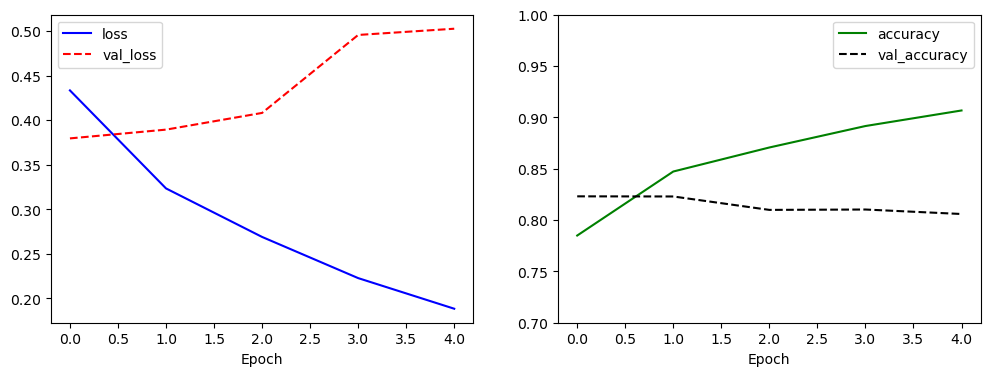

In [22]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [25]:
## 정확도 측정
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X ]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in test_text_X]

# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new

sequences = tokenizer.texts_to_sequences(sentences) # 인덱스를 반환
test_X = pad_sequences(sequences,padding='post')   # 문장의 뒤부분으로 0을 패딩한다, 공백도 0으로 채워진다

test_X[:5]  # 25개의 길이로 패딩 완성

array([[  593,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  357,     8,  4625,   989,    68,  3347,  2773,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 2111,    31, 12564,   506,  1449,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [17857,   108, 12075,   243, 18890,    10,  3364,   347,   467,
        12717,     4,     4,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [27]:
# 평가
model.evaluate(test_X,test_Y,verbose=0)

[0.5127271413803101, 0.8014199733734131]

In [28]:
# 임의의 문장 감성 분석 예측 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ') # ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
# test_sentences  # 9개

sequences = tokenizer.texts_to_sequences(test_sentences) 
test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 
# test_X_1

prediction = model.predict(test_X_1)  # 분류할 값 2개가 확률로 출력

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 0s 178ms/step
['재미있을']
[0.28329545 0.71670455]
['재미있을', '줄']
[0.33216774 0.6678323 ]
['재미있을', '줄', '알았는데']
[0.40190297 0.5980971 ]
['재미있을', '줄', '알았는데', '완전']
[0.38542733 0.6145727 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.38542733 0.6145727 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.56883574 0.43116423]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.99158704 0.00841304]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9978181  0.00218184]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9978181  0.00218184]


In [29]:
# 감성 분석 함수 구현
def sentiment_predict(test_sentence):
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []

    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    sequences = tokenizer.texts_to_sequences(test_sentences) 
    test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 

    prediction = model.predict(test_X_1)  

    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]
    
    if(score[0] > score[1]):
        print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
    else:
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100))
sentiment_predict('이 영화 개꿀잼 ~')

1/1 [==============================] - 0s 12ms/step
94.06% 확률로 긍정 리뷰입니다.


In [30]:
sentiment_predict('재미가 있는듯 없는듯~')

1/1 [==============================] - 0s 13ms/step
98.90% 확률로 부정 리뷰입니다.


In [31]:
sentiment_predict('볼만해~')

1/1 [==============================] - 0s 12ms/step
53.48% 확률로 긍정 리뷰입니다.


In [32]:
sentiment_predict('잘 모르겠다 ~')

1/1 [==============================] - 0s 15ms/step
91.28% 확률로 부정 리뷰입니다.


In [33]:
sentiment_predict('배우로 본다 ~')

1/1 [==============================] - 0s 13ms/step
66.51% 확률로 긍정 리뷰입니다.


In [35]:
sentiment_predict('흠')

1/1 [==============================] - 0s 15ms/step
59.94% 확률로 부정 리뷰입니다.


In [36]:
sentiment_predict('이거 얼마들었음? ')

1/1 [==============================] - 0s 18ms/step
55.00% 확률로 긍정 리뷰입니다.


In [37]:
sentiment_predict('내가 만드는게 낫겠다')

1/1 [==============================] - 0s 16ms/step
99.63% 확률로 부정 리뷰입니다.


In [39]:
sentiment_predict('김태훈')

1/1 [==============================] - 0s 12ms/step
53.48% 확률로 긍정 리뷰입니다.


In [40]:
sentiment_predict('이태건')

1/1 [==============================] - 0s 13ms/step
53.48% 확률로 긍정 리뷰입니다.


In [41]:
sentiment_predict('쏘쏘')

1/1 [==============================] - 0s 14ms/step
53.48% 확률로 긍정 리뷰입니다.


In [42]:
sentiment_predict('그냥')

1/1 [==============================] - 0s 14ms/step
69.41% 확률로 부정 리뷰입니다.


In [43]:
sentiment_predict('내일 뭐해?')

1/1 [==============================] - 0s 12ms/step
59.30% 확률로 긍정 리뷰입니다.


In [44]:
sentiment_predict('영화 볼래')

1/1 [==============================] - 0s 19ms/step
54.12% 확률로 긍정 리뷰입니다.


In [50]:
sentiment_predict('주인공 부럽다')

1/1 [==============================] - 0s 12ms/step
94.11% 확률로 긍정 리뷰입니다.


In [62]:
# 모델 저장
model.save('naver_movie.h5')